## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

In [4]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
## Your code HERE
#seperate the class
c1_index = np.where(y_train==1)
c2_index = np.where(y_train==0)
x_train_c1 = x_train[c1_index] 
x_train_c2 = x_train[c2_index] 

#calculate the mean
m1 = x_train_c1.mean(axis = 0)
m2 = x_train_c2.mean(axis = 0)

In [7]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [1.82380675 3.03051876] mean vector of class 2: [2.47107265 1.97913899]


## 2. Compute the Within-class scatter matrix SW

In [8]:
## Your code HERE
sw = ((x_train_c1-m1).transpose())@(x_train_c1-m1) + ((x_train_c2-m2).transpose())@(x_train_c2-m2)

In [9]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB

In [10]:
## Your code HERE
m2m1 = np.asmatrix([m2-m1, [0,0]])
sb = m2m1.transpose()@m2m1

In [11]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [13]:
## Your code HERE
w = np.linalg.inv(sw)@(m2-m1)

#dimension: [2, ] -> [2,1]
w = w.reshape(2, 1)

In [14]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[ 0.00432865]
 [-0.00744446]]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [99]:
## Your code HERE
def fda_k_nearest_neighbor_rule(x_train, y_train, x_test, k=5):
    
    #project training data and testing data
    proj_x_train = np.dot(x_train, w)@(w.transpose()) / np.dot(w.transpose(), w)
    proj_x_test = np.dot(x_test, w)@(w.transpose()) / np.dot(w.transpose(), w)
    
    #retrieve the nearest training sample in the project space
    n_train = proj_x_train.shape[0]
    n_test = proj_x_test.shape[0]
    proj_dist_matrix = np.zeros(shape = (n_train, n_test))
    
    for i in range(n_test):
        for j in range(n_train):
            proj_dist_matrix[j, i] = np.linalg.norm(proj_x_train[j] - proj_x_test[i])
            
    #predict x as the class that retrieved sample belongs to
    y_pred = []
    for i in range(n_test):
        label_list = np.argsort(proj_dist_matrix[:, i])[:k]
        vote = sum(y_train[label_list])
        if vote >= round(k/2):
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred), proj_x_train, proj_x_test

In [113]:
fda_result = fda_k_nearest_neighbor_rule(x_train, y_train, x_test, k=7)
y_pred = fda_result[0]
acc = accuracy_score(y_test, y_pred)

In [114]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.908


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

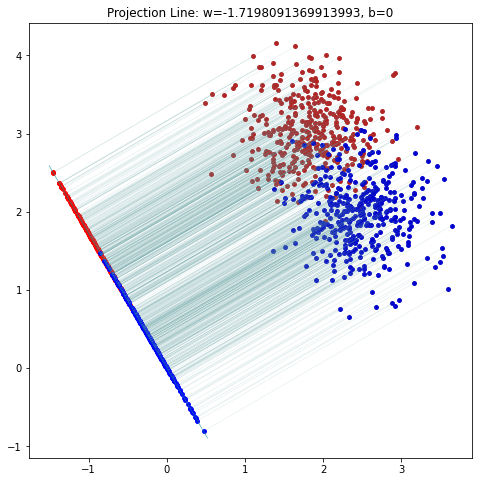

In [115]:
#get the projection of training data
proj_x_train = fda_result[1]

#figure setting
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Projection Line: w={float(w[1]/w[0])}, b=0')

#plot data points
plt.scatter(x_train_c1[:, 0], x_train_c1[:, 1], s=15, c='firebrick', label='class 1')
plt.scatter(x_train_c2[:, 0], x_train_c2[:, 1], s=15, c='mediumblue', label='class 2')
plt.scatter(proj_x_train[:, 0][c1_index], proj_x_train[:, 1][c1_index], s=15, c='red', label='class 1')
plt.scatter(proj_x_train[:, 0][c2_index], proj_x_train[:, 1][c2_index], s=15, c='blue', label='class 1')

#plot the line bwtween the data points and their prjection points 
for i in range(x_train.shape[0]):
    plt.plot([x_train[i][0], proj_x_train[i][0]], [x_train[i][1], proj_x_train[i][1]], color='cadetblue', linewidth=0.1)

#plot projection line   
x_vals = np.linspace(np.min(proj_x_train[:, 0]) - 0.05, np.max(proj_x_train[:, 0]) + 0.05, 100)
y_vals = x_vals * w[1] / w[0]
plt.plot(x_vals, y_vals, color='darkcyan', linewidth=0.5)

plt.show()